### Importing all necessary libraries including my own utils.py file.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import utils

In [29]:
fert = pd.read_csv('./data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('./data/gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('./data/gapminder_population.xlsx', index_col=0)
continents = pd.read_csv('./data/continents.csv', sep=';')

### Checking shapes to see if lengths or widths match.

In [30]:
fert.shape, life.shape, pop.shape

((260, 216), (260, 217), (275, 81))

### Check types, I would like integers for graphing.

In [31]:
fert.dtypes, life.dtypes, pop.dtypes

(1800    float64
 1801    float64
 1802    float64
 1803    float64
 1804    float64
          ...   
 2011    float64
 2012    float64
 2013    float64
 2014    float64
 2015    float64
 Length: 216, dtype: object,
 1800    float64
 1801    float64
 1802    float64
 1803    float64
 1804    float64
          ...   
 2012    float64
 2013    float64
 2014    float64
 2015    float64
 2016    float64
 Length: 217, dtype: object,
 1800    float64
 1810    float64
 1820    float64
 1830    float64
 1840    float64
          ...   
 2011    float64
 2012    float64
 2013    float64
 2014    float64
 2015    float64
 Length: 81, dtype: object)

#### Fertility rates measure how many live births per woman given the average of a particular region or country.

From Wikipedia
* Fertility tends to be correlated with levels of economic development. 
* Historically, developed countries have significantly lower fertility rates, generally correlated with greater wealth, education, urbanization, and other factors.
* Lower is not better, just a sign of development.

In [32]:
fert.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47


In [33]:
life.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72


In [34]:
pop.head(2)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0


### I wrote a simple function that transforms these horizontal DataFrames into vertical ones.

* Creating vertical DataFrames is necessary because it enables us to group and graph this data.

In [35]:
fert = fix_df(fert)

In [36]:
fert.head()

,country,year,total_fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [14]:
life = fix_df(life)

In [16]:
life.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [17]:
pop = fix_df(pop)

In [18]:
pop.head()

,country,year,total_population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0


### The data is then merged together

* Thankfully the fertility, population, and life expectancy tables contain the same countries with the exact same spelling, so merging is very easy.
* The continent DataFrame is then added so that I can later sort these countries and color code them.

In [19]:
df1 = fert.merge(pop)
df2 = df1.merge(life)
df_full = df2.merge(continents, on='country')
df_full

,country,year,total_fertility_rate,total_population,life_expectancy,continent
0,Afghanistan,1800,7.00,3280000.0,28.21,Asia
1,Afghanistan,1810,7.00,3280000.0,28.11,Asia
2,Afghanistan,1820,7.00,3323519.0,28.01,Asia
3,Afghanistan,1830,7.00,3448982.0,27.90,Asia
4,Afghanistan,1840,7.00,3625022.0,27.80,Asia
...,...,...,...,...,...,...
14170,Zimbabwe,2011,3.64,14255592.0,51.60,Africa
14171,Zimbabwe,2012,3.56,14565482.0,54.20,Africa
14172,Zimbabwe,2013,3.49,14898092.0,55.70,Africa
14173,Zimbabwe,2014,3.41,15245855.0,57.00,Africa


### Here I reorder the columns for easier comprehension.

In [20]:
df_full = df_full.iloc[:, [0,5,1,2,3,4]]

In [22]:
df_full = df_full.sort_values(by=['country', 'year'])
df_full

,country,continent,year,total_fertility_rate,total_population,life_expectancy
0,Afghanistan,Asia,1800,7.00,3280000.0,28.21
1,Afghanistan,Asia,1810,7.00,3280000.0,28.11
2,Afghanistan,Asia,1820,7.00,3323519.0,28.01
3,Afghanistan,Asia,1830,7.00,3448982.0,27.90
4,Afghanistan,Asia,1840,7.00,3625022.0,27.80
...,...,...,...,...,...,...
14170,Zimbabwe,Africa,2011,3.64,14255592.0,51.60
14171,Zimbabwe,Africa,2012,3.56,14565482.0,54.20
14172,Zimbabwe,Africa,2013,3.49,14898092.0,55.70
14173,Zimbabwe,Africa,2014,3.41,15245855.0,57.00


### Here I create a dictionary containing continents and the respective colors. This is used in the creation of graphs.

In [23]:
color_list = ('red','blue','green','yellow','purple','orange')
labels = list(df_full['continent'].unique())
colors = dict(zip(labels, color_list))

### Because the data contains a lot of Nan values before the year 1960, I decided to only graph those years from 1960 forward.

In [44]:
data_subset = df_full.loc[df_full['year'] >= 1960]
data_subset.head(2)

,country,continent,year,total_fertility_rate,total_population,life_expectancy
25,Afghanistan,Asia,1960,7.67,8994793.0,31.94
26,Afghanistan,Asia,1961,7.67,9164945.0,32.47


### I changed the values of the population column because otherwise the circle of each country would be too large for the plot.

In [25]:
data_subset.loc[:,'total_population'] /= 100_000

/var/folders/h1/vgc6dlns12lcdg0rg16y4stw0000gn/T/ipykernel_45093/1211020743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.loc[:,'total_population'] /= 100_000


In [39]:
data_subset.tail(2)

,country,continent,year,total_fertility_rate,total_population,life_expectancy
14173,Zimbabwe,Africa,2014,3.41,152.45855,57.0
14174,Zimbabwe,Africa,2015,3.35,156.02751,59.3


### This test plot uses the logic for the entire group, but I needed a simple plot to first try out what I wanted to include and how.

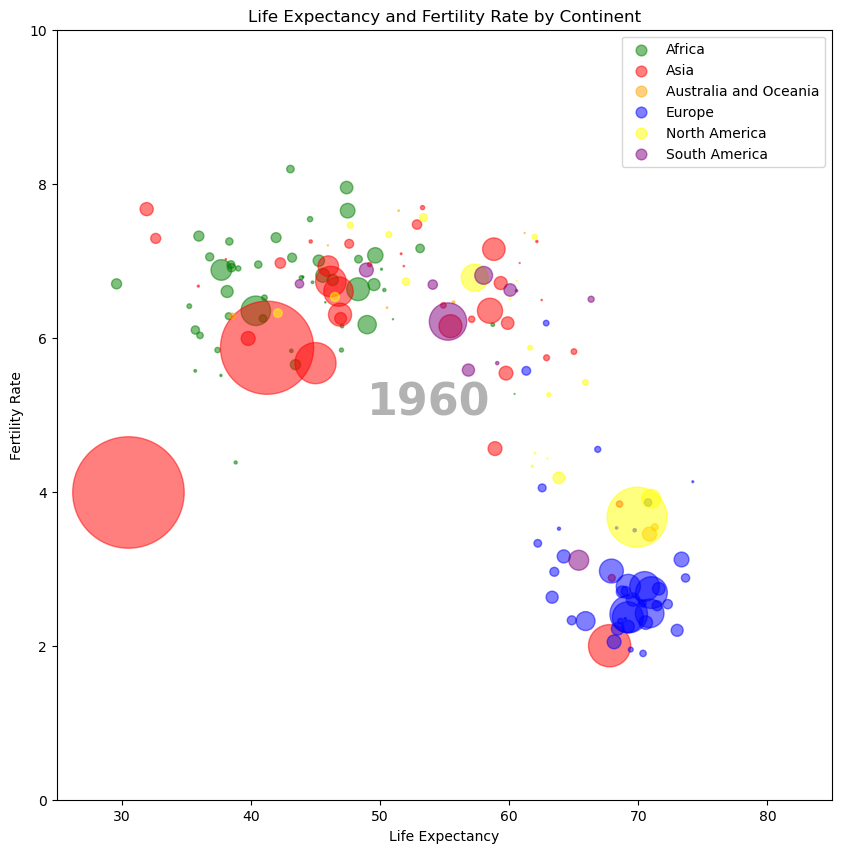

In [27]:
df_test = data_subset.loc[data_subset['year'] == 1960]
grouped_df = df_test.groupby('continent')

fig, ax = plt.subplots(figsize=(10,10))
    
for name, group in grouped_df:
    plt.scatter(x = group['life_expectancy'],
                y = group['total_fertility_rate'],
                color=colors[name],
                s=group['total_population'],
                label=name,
                alpha=.5)

ax.text(49, 5, '1960', fontsize=32, 
        alpha=.3, fontdict={'weight':'bold'})

ax.set_ylabel('Fertility Rate')
ax.set_xlabel('Life Expectancy')
plt.title(f'Life Expectancy and Fertility Rate by Continent')

lgd = plt.legend(loc='upper right')

lgd.legendHandles[0]._sizes = [60]
lgd.legendHandles[1]._sizes = [60]
lgd.legendHandles[2]._sizes = [60]
lgd.legendHandles[3]._sizes = [60]
lgd.legendHandles[4]._sizes = [60]
lgd.legendHandles[5]._sizes = [60]

plt.axis((25, 85, 0, 10))
plt.show()
plt.close;

#### See utils.py for a deeper explanation of this plotting.

In [ ]:
create_plots(data_subset)

#### I chose 5 frames per second because I wanted the gif to move rather slowly, it looks a little jerky at first because of China's rapid expansion and inconsistent reporting.

In [41]:
images = []

for i in range(1960, 2016):
    filename = './data/df_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('full_animated.gif', images, fps=5)